# Plot the run results in interesting ways
---

## What do we want?

- We want a graph with all of the algorithms plotted together
- We want graphs of individual algorithm, varying memory size and page size

In [63]:
from matplotlib import pyplot as plt
import os

# matplotlib configuration
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.labelweight"] = "bold"

In [64]:
algorithms = ['lru', 'fifo', 'newalg']
page_sizes = [2 ** x for x in range(1, 7)] # 2 to 64
memory_sizes = [2** x for x in range(7, 15)] # 128 to 16384
result_dir = 'results'
test_fixtures = ['compressor.log', 'matriz.log', 'compilador.log', 'simulador.log']

In [69]:
class algorithm_result:
    metric_ids = ["num_page_faults", "num_page_writebacks", "execution_time"]
    metric_names = ["# of page faults", "# of page writebacks", "execution time"]
    
    def __init__(self, algorithmName, page_faults, page_wbs, exec_times):
        self.name = algorithmName
        
        self.page_faults = page_faults
        self.page_wbs = page_wbs
        self.exec_times = exec_times
        
        self.metrics = [self.page_faults, self.page_wbs, self.exec_times]

In [73]:
# Plot graph with all algorithms and a fixed fixture -- simulador.log
# - Make sure to plot one graph for each of the metrics: [page faults, page writebacks, execution time]
def plot_graphs_together(result_dir, algorithms, fixture, metrics, psize=None, msize=None, pOrM="p", savePlotFigures=False):
    # If none, use global lists
    psizes = psize or page_sizes
    msizes = msize or memory_sizes
    
    algorithmResults = gather_results_together(result_dir, algorithms, fixture, psizes, msizes, pOrM)
    
    if pOrM == "p":
        plot_results_together(psizes, algorithmResults, pOrM, "page size (KB)", savePlotFigures)
    else:
        plot_results_together(msizes, algorithmResults, pOrM, "memory size (KB)", savePlotFigures)
        
def gather_results_together(result_dir, algorithms, fixture, psizes, msizes, pOrM="p"):
    # A map <algorithm-name>:<algorithm-result>
    algorithmResults = []
    for algorithm in algorithms:
        results = []
        result = None
        
        if pOrM == "p":
            for psize in psizes:
                result = read_result_file(result_dir, algorithm, fixture, psize, msizes)
                results.append(result)
        else:
            for msize in msizes:
                result = read_result_file(result_dir, algorithm, fixture, psizes, msize)
                results.append(result)

        page_faults = [result[0] for result in results]     
        page_wbs = [result[1] for result in results]
        exec_times = [result[2] for result in results]
        algorithmResults.append(algorithm_result(algorithm, page_faults, page_wbs, exec_times))
    return algorithmResults
    
def plot_results_together(xaxis, algorithmResults, pOrM, xlabel, savePlotFigures=False, figureOutDir="results/figures"):
    # For every metric, we want to plot its values for all algorithms
    algoNames = [result.name for result in algorithmResults]
    page_faults = [result.page_faults for result in algorithmResults]
    page_wbs = [result.page_wbs for result in algorithmResults]
    exec_times = [result.exec_times for result in algorithmResults]
    metricIds = algorithm_result.metric_ids
    metricNames = algorithm_result.metric_names
    metrics = [page_faults, page_wbs, exec_times]
    for i in range(len(metrics)):
        # Define title, label and so on
        plt.figure()
        plt.xlabel(xlabel)
        plt.ylabel(metricNames[i])
        # Actual plot
        x = xaxis
        for j in range(len(metrics[i])):
            y = metrics[i][j]
            plt.plot(x, y, label=algoNames[j])
        
        plt.legend()
        if savePlotFigures:
            os.system(f"mkdir -p {figureOutDir}")
            plt.savefig(f"{figureOutDir}/together_{pOrM}_{metricIds[i]}.png")

def read_result_file(result_dir, algorithm, fixture, psize, msize):
    result_file_name = f"{result_dir}/{algorithm}/{fixture}_{psize}_{msize}"
    with open(result_file_name) as result_file:
        return [float(result) for result in result_file.read().split(" ")]

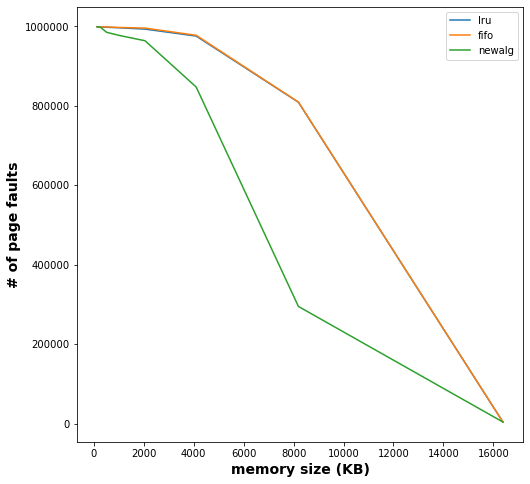

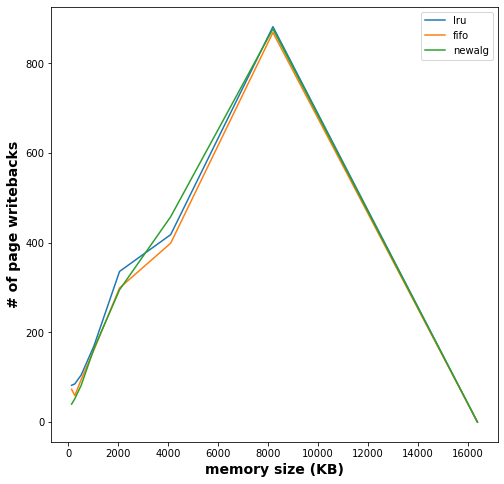

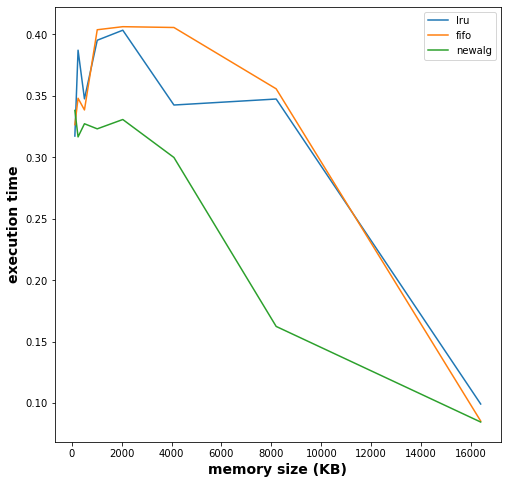

In [75]:
plot_graphs_together(result_dir, algorithms, "simulador.log", metrics, psize=4, pOrM="m", savePlotFigures=True)

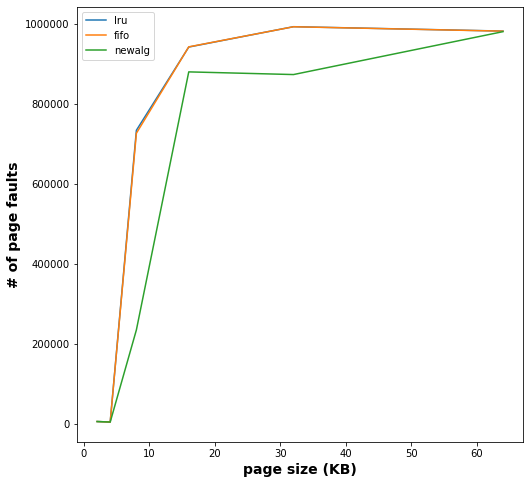

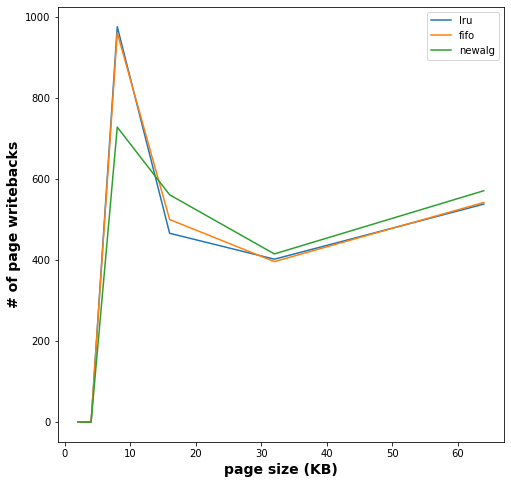

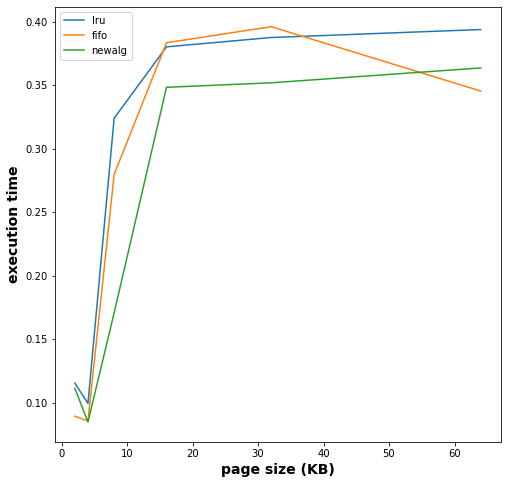

In [76]:
plot_graphs_together(result_dir, algorithms, "simulador.log", metrics, msize=16384, pOrM="p", savePlotFigures=True)